In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import enum
import numpy as np

class CellType(enum.IntEnum):
    HSC = 0
    MPP1 = 1
    MPP2 = 2
    MPP3 = 3
    MPP4 = 4
    MPP5 = 5
    CMP = 6
    CLP = 7
    MEP = 8
    GMP = 9
    Erythroblast1 = 10
    Erythroblast2 = 11
    Erythroblast3 = 12
    Erythroblast4 = 13
    Erythroblast5 = 14
    Erythroblast6 = 15
    Erythroblast7 = 16
    Erythroblast8 = 17
    RBC = 18
    Myeloblast1 = 19
    Myeloblast2 = 20
    Myeloblast3 = 21
    Myeloblast4 = 22
    Myeloblast5 = 23
    Myeloblast6 = 24
    Myeloblast7 = 25
    Myeloid = 26
    Megakaryocyte = 27
    Platelet = 28
    Lymphocyte1 = 29
    Lymphocyte2 = 30
    Lymphocyte3 = 31
    Lymphocyte4 = 32
    Lymphocyte5 = 33
    Lymphocyte6 = 34
    Lymphocyte7 = 35
    Lymphocyte8 = 36
    Lymphocyte9 = 37
    Lymphocyte10 = 38
    Bcell = 39
    STROMA = 40

HSC = [CellType.HSC] 
MPP = [CellType.MPP1, CellType.MPP2, CellType.MPP3, CellType.MPP4, CellType.MPP5]
RPP = [CellType.CMP, CellType.CLP, CellType.MEP, CellType.GMP]


In [4]:
df = pd.read_csv('../data/cold_all_steps.csv')
df


,step,cell_type,x,y,dx,dy,clone_id,vessel_neighbourhood,status,cell_id
0,0,0,380.5910,480.2912,0.0000,0.0000,0,0,0,0
1,0,0,3.3133,351.8343,0.0000,0.0000,1,0,0,1
2,0,0,373.6730,86.7992,0.0000,0.0000,2,0,0,2
3,0,0,354.0248,490.9540,0.0000,0.0000,3,0,0,3
4,0,0,482.9882,390.9050,0.0000,0.0000,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...
93743,5000,24,194.3369,286.0146,-0.0499,-0.0869,3,0,0,5587
93744,5000,26,202.4362,158.6748,-0.1683,0.0047,2,0,0,5588
93745,5000,26,265.0830,268.2304,-0.0350,0.0460,4,0,0,5589
93746,5000,26,31.6911,257.8146,0.2241,-0.0833,1,0,0,5590


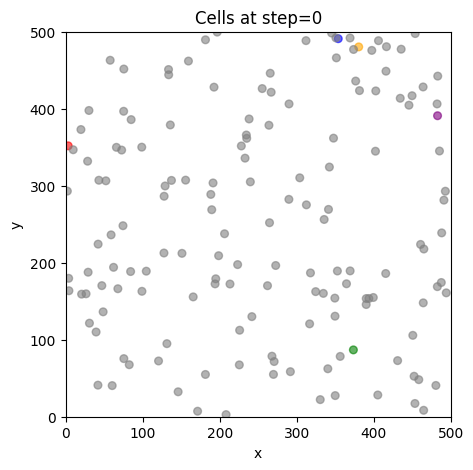

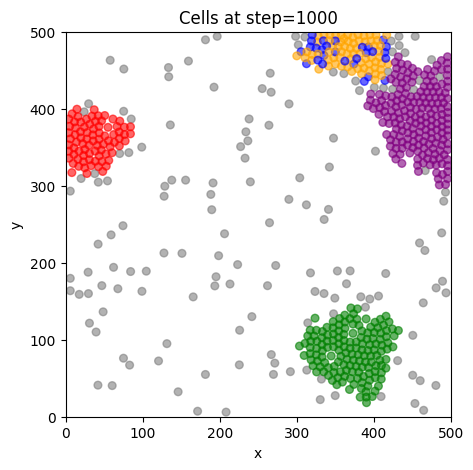

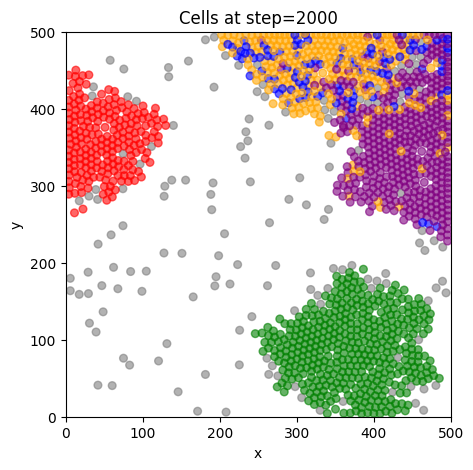

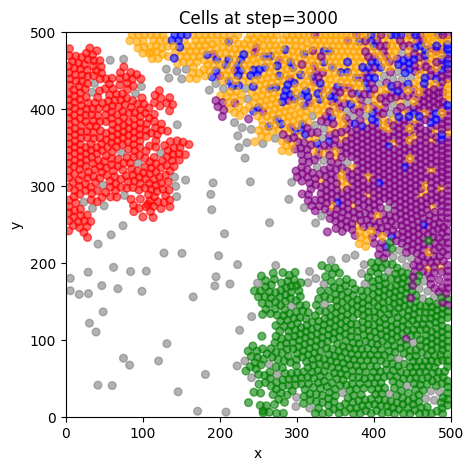

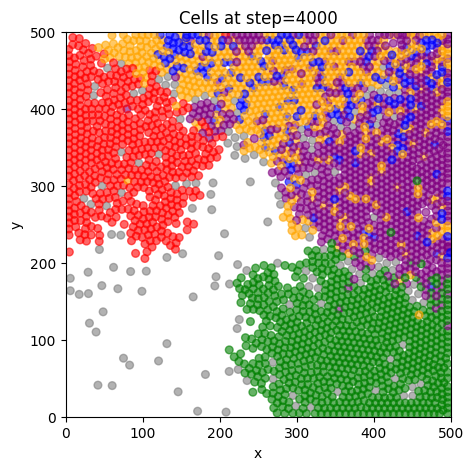

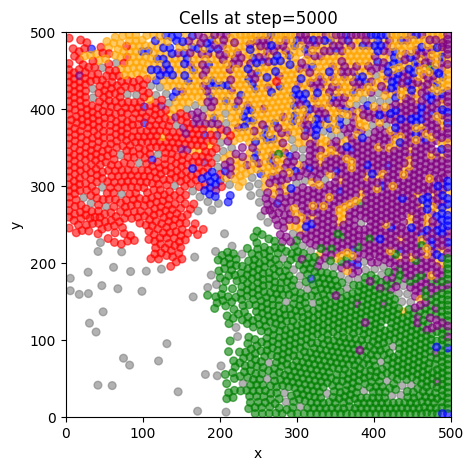

In [13]:
colors = ['orange', 'red', 'green', 'blue', 'purple']

def get_step_data(step: int):
    d = df[df.step == step].copy()
    return d

step_data = get_step_data(df.step.max())

def plot_cells(step_data: pd.DataFrame):
    plt.figure(figsize=(5, 5), dpi=100)
    ax = plt.gca()
    for _, row in step_data.iterrows():
        color = colors[row['clone_id'].astype(int)] if row['clone_id'] >= 0 else 'gray'
        circle = plt.Circle((row['x'], row['y']), 5, color=color, alpha=0.6)
        ax.add_patch(circle)

    ax.set_xlim(0, 500)
    ax.set_ylim(0, 500)
    ax.set_aspect('equal')
    plt.title(f'Cells at step={step_data.step.values[0]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_cells(get_step_data(0))
plot_cells(get_step_data(1000))
plot_cells(get_step_data(2000))
plot_cells(get_step_data(3000))
plot_cells(get_step_data(4000))
plot_cells(get_step_data(5000))

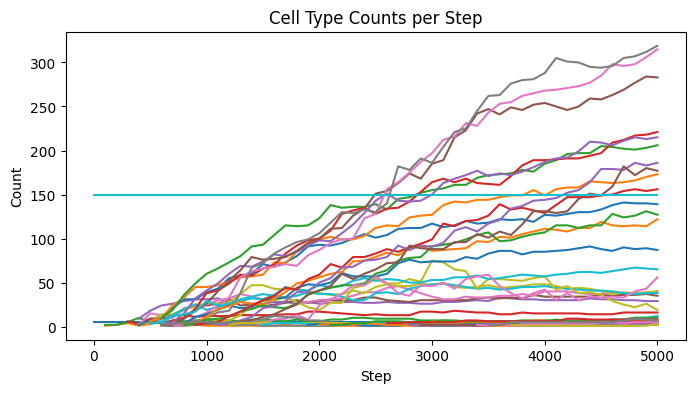

In [5]:
counts = df.groupby('step')['cell_type'].value_counts().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=counts, x='step', y='count', hue='cell_type', legend=False, palette='tab10')
plt.title('Cell Type Counts per Step')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

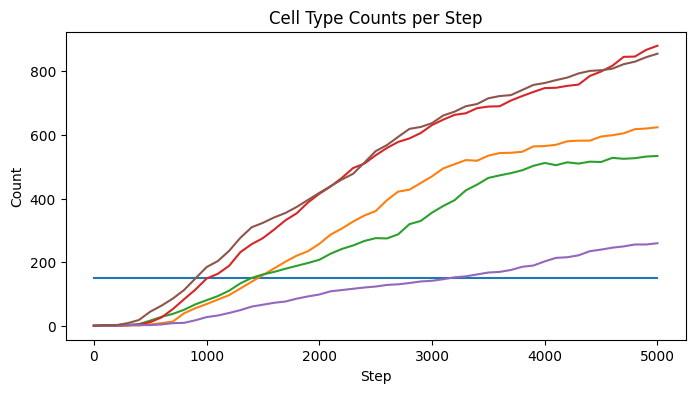

In [10]:

counts = df.groupby('step')['clone_id'].value_counts().reset_index()


plt.figure(figsize=(8, 4))
sns.lineplot(data=counts, x='step', y='count', hue='clone_id', legend=False, palette='tab10')
plt.title('Cell Type Counts per Step')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()